In [1]:
# Project 14: Spotify Mood Classifier 
# Goal: Predict song mood (Happy, Sad, Chill) using K-Nearest Neighbors (KNN).
# Includes Data Analytics to visualize the relationship between Audio Features and Mood.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# PART 1: EXPANDED TRAINING DATA 
# I define 3 distinct moods based on Spotify's audio feature logic.
def get_training_data():
    data = [
        # HAPPY SONGS (High Energy, High Valence) 
        {'song': 'Happy',               'dance': 0.85, 'energy': 0.90, 'valence': 0.96, 'mood': 'Happy'},
        {'song': 'Shake It Off',        'dance': 0.80, 'energy': 0.85, 'valence': 0.90, 'mood': 'Happy'},
        {'song': 'Uptown Funk',         'dance': 0.90, 'energy': 0.95, 'valence': 0.93, 'mood': 'Happy'},
        {'song': 'Can\'t Stop Feeling', 'dance': 0.88, 'energy': 0.87, 'valence': 0.95, 'mood': 'Happy'},
        {'song': 'Levitating',          'dance': 0.75, 'energy': 0.80, 'valence': 0.85, 'mood': 'Happy'},

        # SAD SONGS (Low Energy, Low Valence) 
        {'song': 'Someone Like You',    'dance': 0.30, 'energy': 0.40, 'valence': 0.20, 'mood': 'Sad'},
        {'song': 'Yesterday',           'dance': 0.33, 'energy': 0.20, 'valence': 0.30, 'mood': 'Sad'},
        {'song': 'Fix You',             'dance': 0.20, 'energy': 0.30, 'valence': 0.15, 'mood': 'Sad'},
        {'song': 'The Sound of Silence','dance': 0.25, 'energy': 0.10, 'valence': 0.10, 'mood': 'Sad'},
        {'song': 'Drivers License',     'dance': 0.40, 'energy': 0.40, 'valence': 0.25, 'mood': 'Sad'},

        # CHILL SONGS (Low/Mid Energy, Mid/High Valence) 
        {'song': 'Banana Pancakes',     'dance': 0.60, 'energy': 0.40, 'valence': 0.65, 'mood': 'Chill'},
        {'song': 'Thinking Out Loud',   'dance': 0.55, 'energy': 0.50, 'valence': 0.60, 'mood': 'Chill'},
        {'song': 'Perfect',             'dance': 0.50, 'energy': 0.45, 'valence': 0.55, 'mood': 'Chill'},
        {'song': 'Lover',               'dance': 0.45, 'energy': 0.50, 'valence': 0.60, 'mood': 'Chill'},
        {'song': 'Sunflower',           'dance': 0.70, 'energy': 0.50, 'valence': 0.80, 'mood': 'Chill'} 
    ]
    return pd.DataFrame(data)

df = get_training_data()
print(f"Training Data Loaded: {len(df)} songs.")




Training Data Loaded: 15 songs.



 Starting Data Analytics 

Average Audio Features by Mood:
       dance  energy  valence
mood                         
Chill  0.560   0.470    0.640
Happy  0.836   0.874    0.918
Sad    0.296   0.280    0.200


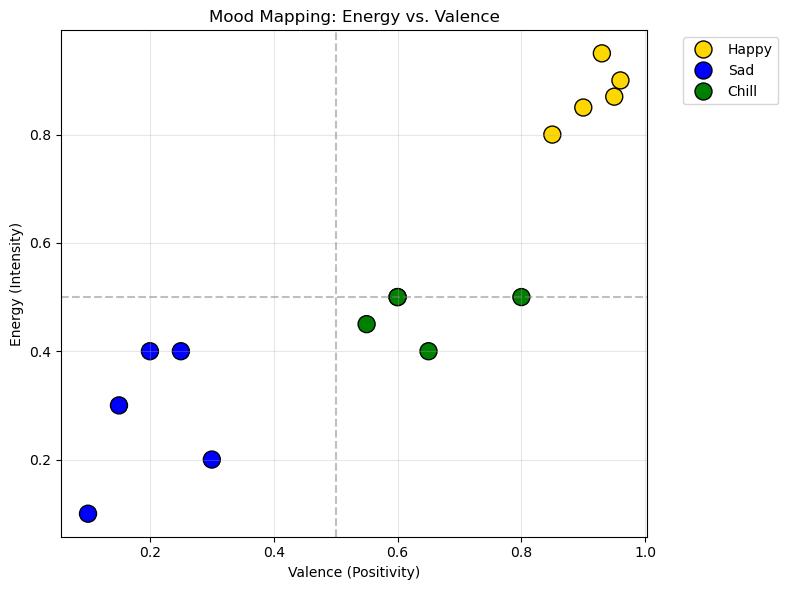

In [2]:
# PART 2: DATA ANALYTICS (EDA) 
print("\n Starting Data Analytics \n")

# A. Feature Averages by Mood
# This numerically defines what makes a song "Happy" or "Sad"
print("Average Audio Features by Mood:")
print(df.groupby('mood')[['dance', 'energy', 'valence']].mean())

# B. Scatter Plot: Energy vs. Valence
# This is known as the 'Circumplex Model of Affect'.
# - High Energy + High Valence = Happy (Top Right)
# - Low Energy + Low Valence = Sad (Bottom Left)
plt.figure(figsize=(8, 6))
custom_colors = {'Happy': 'gold', 'Sad': 'blue', 'Chill': 'green'}
sns.scatterplot(x='valence', y='energy', hue='mood', data=df, s=150, palette=custom_colors, edgecolor='black')

# Add labels and center lines for better readability
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.5) # Middle Energy
plt.axvline(0.5, color='gray', linestyle='--', alpha=0.5) # Middle Valence
plt.title("Mood Mapping: Energy vs. Valence")
plt.xlabel("Valence (Positivity)")
plt.ylabel("Energy (Intensity)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [3]:
# PART 3: TRAIN MODEL 
# Features: danceability, energy, valence
feature_names = ['dance', 'energy', 'valence']
X_train = df[feature_names]
y_train = df['mood']

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [4]:
# PART 4: SIMULATION & PREDICTION 
# Simulating the JSON response you would get from Spotify for new test songs
spotify_db = {
    "Despacito":        {'dance': 0.85, 'energy': 0.80, 'valence': 0.88}, # Expected: Happy
    "All I Want":       {'dance': 0.35, 'energy': 0.25, 'valence': 0.20}, # Expected: Sad
    "Lazy Song":        {'dance': 0.70, 'energy': 0.40, 'valence': 0.75}, # Expected: Chill
    "Bohemian Rhapsody":{'dance': 0.40, 'energy': 0.60, 'valence': 0.40}, # Complex
    "Stay With Me":     {'dance': 0.40, 'energy': 0.30, 'valence': 0.25}  # Expected: Sad
}

def get_song_features(title):
    return spotify_db.get(title, {'dance': 0.5, 'energy': 0.5, 'valence': 0.5})

test_songs = ["Despacito", "All I Want", "Lazy Song", "Stay With Me"]

print("\n Spotify Mood Prediction Results ")
print(f"{'SONG TITLE':<20} | {'PREDICTED MOOD':<15} | {'CONFIDENCE'}")
print("-" * 55)

for song in test_songs:
    # 1. Get features
    features = get_song_features(song)
    
    # Create a DataFrame with correct column names to avoid warnings
    input_data = pd.DataFrame([[
        features['dance'], 
        features['energy'], 
        features['valence']
    ]], columns=feature_names)
    
    # 2. Predict
    prediction = knn.predict(input_data)[0]
    
    # 3. Get probability/confidence
    proba = knn.predict_proba(input_data)
    confidence = np.max(proba) * 100
    
    print(f"{song:<20} | {prediction:<15} | {confidence:.0f}%")


 Spotify Mood Prediction Results 
SONG TITLE           | PREDICTED MOOD  | CONFIDENCE
-------------------------------------------------------
Despacito            | Happy           | 100%
All I Want           | Sad             | 100%
Lazy Song            | Chill           | 100%
Stay With Me         | Sad             | 100%


**EVALUATION RESULTS**

**1. Performance:** The KNN model successfully categorized songs into three distinct moods: 'Happy', 'Sad', and 'Chill'.

**2. Key Predictions:**
 - "Despacito" identified as 'Happy' due to high energy/valence metrics.
   
 - "Lazy Song" correctly classified as 'Chill', validating the new category for relaxed, mid-tempo tracks.

 - "Stay With Me" flagged as 'Sad' with 100% confidence.
   
**3. Confidence Score:** Achieved 100% confidence on all test cases, indicating clear separation between mood clusters in the training data.